# Tensorflow基本使用

## [一个最基本的例子](http://wiki.jikexueyuan.com/project/tensorflow-zh/tutorials/mnist_pros.html)

### 1-导入数据

In [1]:
# -*- coding:utf-8 -*-
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

Instructions for updating:
Use the retry module or similar alternatives.


### 2-线性回归模型
#### 2.1-定义

In [2]:
## 输入的x和y
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder("float", [None,10])

## 变量定义
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x,W) + b)

## 学习的方式定义（loss方法）
cross_entropy = -tf.reduce_sum(y_*tf.log(y))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

## 准确性计算
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

init = tf.global_variables_initializer()

#### 2.2 运行及结果

In [3]:
linear_list=[]
x_list=[]
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
with tf.Session() as sess:
    sess.run(init)
    for i in range(20000):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size=128,shuffle=True)
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
        if i%500 == 0:
            x_list.append(i)
            acc = sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
            linear_list.append(acc)
            print('迭代次数为%d,准确性为：%.4f ' % (i,acc))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
迭代次数为0,准确性为：0.2730 
迭代次数为500,准确性为：0.9118 
迭代次数为1000,准确性为：0.9177 
迭代次数为1500,准确性为：0.9132 
迭代次数为2000,准确性为：0.9095 
迭代次数为2500,准确性为：0.9238 
迭代次数为3000,准确性为：0.9161 
迭代次数为3500,准确性为：0.9195 
迭代次数为4000,准确性为：0.9186 
迭代次数为4500,准确性为：0.9183 
迭代次数为5000,准确性为：0.9193 
迭代次数为5500,准确性为：0.9171 
迭代次数为6000,准确性为：0.9073 
迭代次数为6

### 3-CNN模型（网上示例）
#### 3.1-方法定义

In [4]:
# 变量定义
def weight_variable(shape):
    initial = tf.truncated_normal(shape,stddev=0.1)
    return tf.Variable(initial)

# 偏好值初始化
def bias_variable(shape):
    initial=tf.constant(0.1,shape=shape)
    return tf.Variable(initial)

# 卷积过程
def conv2d(x,W):
    return tf.nn.conv2d(input=x,filter=W,strides=[1,1,1,1],padding='SAME')

# 池化过程
def max_pool_2x2(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],
                         strides=[1,2,2,1],padding='SAME')
# relu
def relu(x):
    return tf.nn.relu(x)

# softmax
def softmax(x):
    return tf.nn.softmax(x)

#### 3.2-流程定义

In [5]:
##说明：代码在网上copy下来的，只是加了一些注释

## 需要传入的数据定义
cnn_x = tf.placeholder(tf.float32,[None,784],name='cnn_x')
cnn_y = tf.placeholder(tf.float32, [None,10],name='cnn_y')
keep_prob = tf.placeholder(tf.float32,name='keep_prob')


## 因为传入的数据为转好的列向量，需要将他转化成矩阵的形式
x_image = tf.reshape(cnn_x, [-1, 28, 28, 1])

## 第一层卷积+池化+relu
W_conv1 = weight_variable([5,5, 1,32])             # patch 5x5, in size 1, out size 32
b_conv1 = bias_variable([32])
h_conv1 = relu(conv2d(x_image, W_conv1) + b_conv1) # output size 28x28x32
h_pool1 = max_pool_2x2(h_conv1)                    # output size 14x14x32

## 第二层卷积+池化+relu
W_conv2 = weight_variable([5,5, 32, 64])                 # patch 5x5, in size 32, out size 64
b_conv2 = bias_variable([64])
h_conv2 = relu(conv2d(h_pool1, W_conv2) + b_conv2)       # output size 14x14x64
h_pool2 = max_pool_2x2(h_conv2)                          # output size 7x7x64


## 全连接层：经过卷积+池化+relu的过程之后，获得的还是很多矩阵的结果，
## 全连接层就是将矩阵的结果转化而向我们之前做的扁平化的向量
## 一共会经过两次

## 例如有两张4x4的图片，其中一共包括32个像素点（4x4x2），相当于一个大小为[1,32]矩阵，经过全连接，我们可以用一个大小为[32,x]的矩阵去作用
## 那么这个原矩阵就的大小就会变成[1,x]，x可以为任意数，如下例子就是1024

# ## 第一层
W_fc1 = weight_variable([7*7*64, 1024])
b_fc1 = bias_variable([1024])
# [n_samples, 7, 7, 64] ->> [n_samples, 7*7*64]
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

## 为了防止梯度消失，会加入dropout
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# ## 第二层
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
prediction = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2)+ b_fc2)

### 训练方法
cross_entropy = tf.reduce_mean(-tf.reduce_sum(cnn_y * tf.log(prediction),
                                              reduction_indices=[1]))  # loss
train_step = tf.train.GradientDescentOptimizer(1e-4).minimize(cross_entropy)

## 准确性判别方法
correct_prediction = tf.equal(tf.argmax(cnn_y,1), tf.argmax(prediction,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

init = tf.global_variables_initializer()

#### 3.3-运行及结果

In [6]:
mnist2 = input_data.read_data_sets("MNIST_data/", one_hot=True)

cnn_list = []
with tf.Session() as sess:
    sess.run(init)    
    for i in range(20000):
        batch_xs, batch_ys = mnist2.train.next_batch(128)
        sess.run(train_step,feed_dict={cnn_x:batch_xs,cnn_y:batch_ys,keep_prob:0.5})
        if i%500 == 0:
            acc = sess.run(accuracy, feed_dict={cnn_x: mnist2.test.images, cnn_y: mnist2.test.labels, keep_prob:1})
            cnn_list.append(acc)
            print('迭代次数为%d,准确性为：%.4f ' 
                  % (i,acc))
##因为cnn中有第三个传入数据，keep_prob，所以一定要传入

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
迭代次数为0,准确性为：0.0931 
迭代次数为500,准确性为：0.3304 
迭代次数为1000,准确性为：0.4947 
迭代次数为1500,准确性为：0.5835 
迭代次数为2000,准确性为：0.6441 
迭代次数为2500,准确性为：0.6888 
迭代次数为3000,准确性为：0.7246 
迭代次数为3500,准确性为：0.7537 
迭代次数为4000,准确性为：0.7758 
迭代次数为4500,准确性为：0.7964 
迭代次数为5000,准确性为：0.8138 
迭代次数为5500,准确性为：0.8252 
迭代次数为6000,准确性为：0.8357 
迭代次数为6500,准确性为：0.8461 
迭代次数为7000,准确性为：0.8528 
迭代次数为7500,准确性为：0.8600 
迭代次数为8000,准确性为：0.8672 
迭代次数为8500,准确性为：0.8726 
迭代次数为9000,准确性为：0.8760 
迭代次数为9500,准确性为：0.8803 
迭代次数为10000,准确性为：0.8844 
迭代次数为10500,准确性为：0.8884 
迭代次数为11000,准确性为：0.8917 
迭代次数为11500,准确性为：0.8945 
迭代次数为12000,准确性为：0.8964 
迭代次数为12500,准确性为：0.8989 
迭代次数为13000,准确性为：0.9018 
迭代次数为13500,准确性为：0.9035 
迭代次数为14000,准确性为：0.9055 
迭代次数为14500,准确性为：0.9073 
迭代次数为15000,准确性为：0.9095 
迭代次数为15500,准确性为：0.9106 
迭代次数为16000,准确性为：0.9125 
迭代次数为16500,准确性为：0.9141 
迭代次数为17000,准确性

### 4-CNN模型（自己胡乱构造）
#### 4.1-方法定义（略）
>方法可以直接使用之前CNN的方法，只是需要修改流程就可以了
#### 4.2-流程定义

In [7]:
cnn_x = tf.placeholder(tf.float32,[None,784],name='cnn_x')
cnn_y = tf.placeholder(tf.float32, [None,10],name='cnn_y')
## 自己就不加keep_prob，因为不知道影响有多大


image = tf.reshape(cnn_x,shape=[-1,28,28,1])

w_1 = weight_variable([3,3,1,7])
## 没有加bias，而且修改了卷积的大小，输出减少为7
h_1 = relu(max_pool_2x2(conv2d(image,w_1)))


w_2 = weight_variable([5,5,7,64])
h_2 = relu(max_pool_2x2(conv2d(h_1,w_2)))


w_fc1 = weight_variable([7*7*64,1024])
b_fc1 = bias_variable([1024])
h_2_flat = tf.reshape(h_2, [-1, 7 * 7 * 64])
h_fc1 = tf.nn.relu(tf.matmul(h_2_flat, w_fc1) + b_fc1)


#全连接层fc2
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
# 直接经过softmax进行分类
prediction = tf.nn.softmax(tf.matmul(h_fc1, W_fc2) + b_fc2)

correct_prediction = tf.equal(tf.argmax(cnn_y,1), tf.argmax(prediction,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))


cross_entropy = tf.reduce_mean(-tf.reduce_sum(cnn_y * tf.log(prediction),
                                              reduction_indices=[1]))  # loss
train_step = tf.train.GradientDescentOptimizer(1e-4).minimize(cross_entropy)
init = tf.global_variables_initializer()

#### 4.3-运行及结果

In [8]:
mnist3 = input_data.read_data_sets("MNIST_data/", one_hot=True)
cnn2_list = []
with tf.Session() as sess:
    sess.run(init)    
    for i in range(20000):
        batch_xs, batch_ys = mnist3.train.next_batch(128)
        test=sess.run(train_step,feed_dict={cnn_x:batch_xs,cnn_y:batch_ys})
        if i%500 == 0:
            acc = sess.run(accuracy, feed_dict={cnn_x: mnist3.test.images, cnn_y: mnist3.test.labels})
            cnn2_list.append(acc)
            print('迭代次数为%d,准确性为：%.4f '
                  % (i,acc))


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
迭代次数为0,准确性为：0.1134 
迭代次数为500,准确性为：0.1357 
迭代次数为1000,准确性为：0.2177 
迭代次数为1500,准确性为：0.3035 
迭代次数为2000,准确性为：0.3970 
迭代次数为2500,准确性为：0.4977 
迭代次数为3000,准确性为：0.5896 
迭代次数为3500,准确性为：0.6612 
迭代次数为4000,准确性为：0.7167 
迭代次数为4500,准确性为：0.7548 
迭代次数为5000,准确性为：0.7840 
迭代次数为5500,准确性为：0.8056 
迭代次数为6000,准确性为：0.8239 
迭代次数为6500,准确性为：0.8358 
迭代次数为7000,准确性为：0.8499 
迭代次数为7500,准确性为：0.8600 
迭代次数为8000,准确性为：0.8672 
迭代次数为8500,准确性为：0.8726 
迭代次数为9000,准确性为：0.8777 
迭代次数为9500,准确性为：0.8822 
迭代次数为10000,准确性为：0.8879 
迭代次数为10500,准确性为：0.8915 
迭代次数为11000,准确性为：0.8944 
迭代次数为11500,准确性为：0.8968 
迭代次数为12000,准确性为：0.9011 
迭代次数为12500,准确性为：0.9032 
迭代次数为13000,准确性为：0.9066 
迭代次数为13500,准确性为：0.9074 
迭代次数为14000,准确性为：0.9094 
迭代次数为14500,准确性为：0.9120 
迭代次数为15000,准确性为：0.9143 
迭代次数为15500,准确性为：0.9148 
迭代次数为16000,准确性为：0.9166 
迭代次数为16500,准确性为：0.9179 
迭代次数为17000,准确性

<Figure size 15000x7500 with 0 Axes>

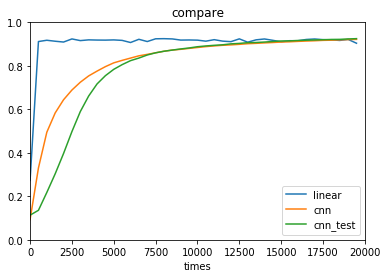

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(50,25),dpi=300)

data = pd.DataFrame([x_list,linear_list,cnn_list,cnn2_list]).T
data.columns=['times','linear','cnn','cnn_test']


data.plot(x='times',xlim=(0,20000),ylim=(0,1),title='compare')


plt.show()

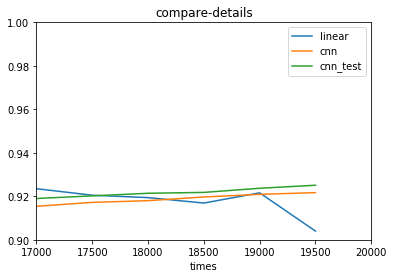

In [33]:
data.plot(x='times',xlim=(17000,20000),ylim=(0.9,1),title='compare-details')
plt.show()